# Exercise 4.9 - Part 2

## (Q1) Import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Set path
path = r'C:\Users\kyles\CareerFoundary\Data Immersion\Achievement 4 - Instacart Basket Analysis'

In [4]:
# Import newest project data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
# Check imported data
pd.options.display.max_columns = None
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,merge_1,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_product_price,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_2
0,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,2539329,1,1,2,8,NaN,True,2,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,26405,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,2539329,1,1,2,8,NaN,True,5,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,12427,Original Beef Jerky,23,19,4.4,2539329,1,1,2,8,NaN,True,3,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,196,Soda,77,7,9.0,2539329,1,1,2,8,NaN,True,1,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,26088,Aged White Cheddar Popcorn,23,19,4.7,2539329,1,1,2,8,NaN,True,4,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
ords_prods_all.shape

(32399732, 32)

## (Q2) Follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### Bar Charts

<Axes: xlabel='orders_day_of_week'>

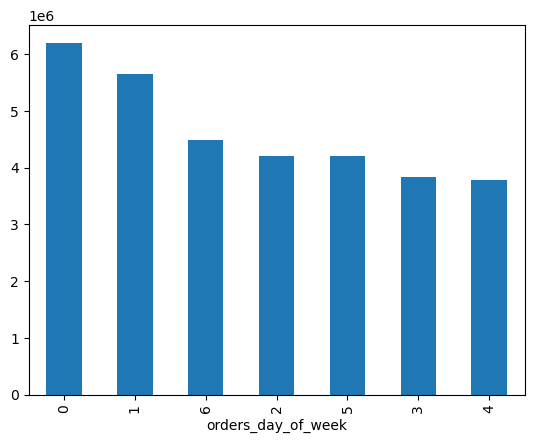

In [6]:
# Creating simple bar chart
ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

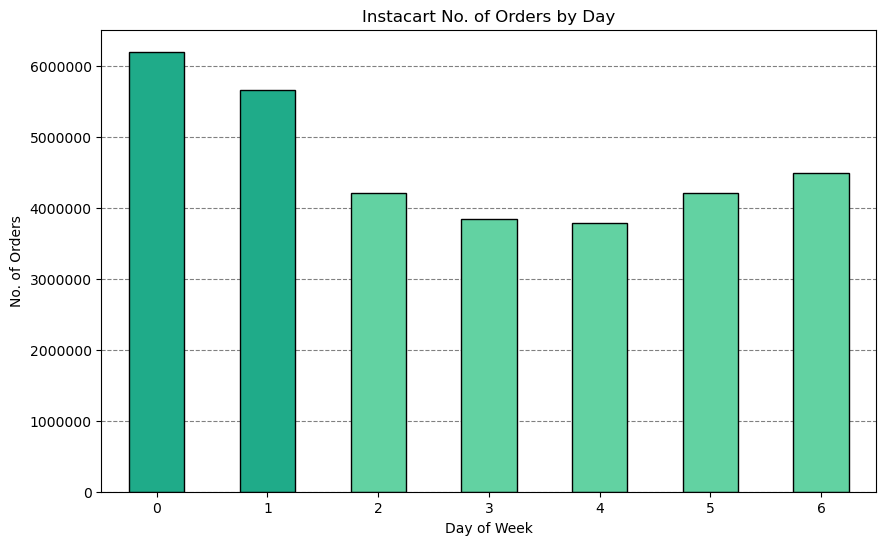

In [46]:
# Ordering columns based on index (chronological order)
plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['#1FAB89', '#1FAB89', '#62D2A2', '#62D2A2', '#62D2A2', '#62D2A2', '#62D2A2'],
                                                                          zorder = 2, 
                                                                          edgecolor = 'black')
                                                                         
plt.title('Instacart No. of Orders by Day')
plt.xlabel('Day of Week')
plt.ylabel('No. of Orders')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_orders_by_day.png'), bbox_inches = 'tight')

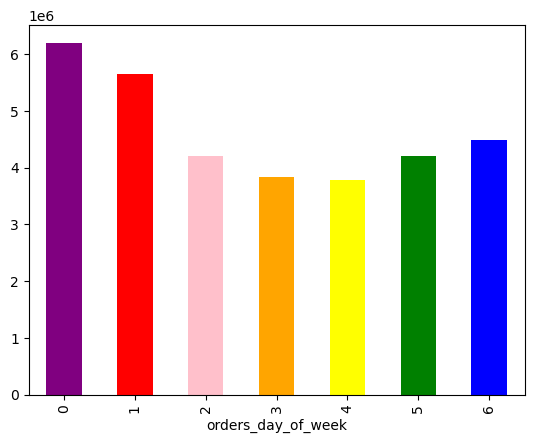

In [8]:
# Colouring columns, sorting by index, and saving as an object
bar = ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Histogram

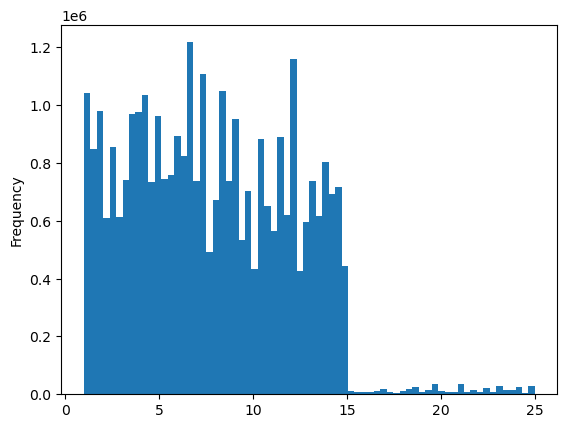

In [9]:
# Create and save histogram as an object
hist = ords_prods_all['prices'].plot.hist(bins = 70)

Due to earlier removal of outlier values, there was no need to conduct further cleaning

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

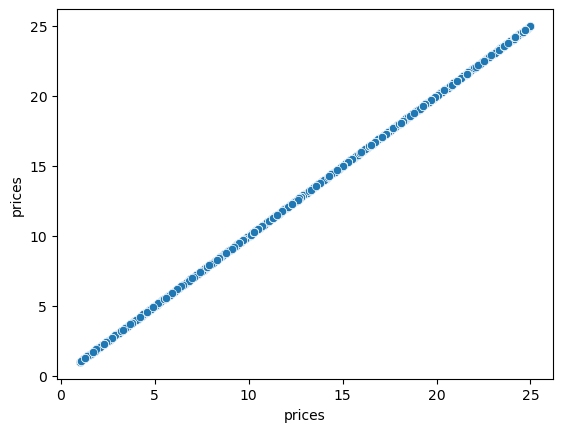

In [10]:
# The following scatterplot is used to check for any outlier values in the prices column
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_all)

### Line Chart

In [11]:
# Start with sampling data by setting a seed
np.random.seed(4)

In [12]:
# Create a list to be used for dividing dataset into a big and small representative sample:
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [13]:
# Create small sample dataframe:
small = ords_prods_all[~dev]

In [14]:
# Create big sample darafram
big = ords_prods_all[dev]

In [15]:
# Check number of rows in small and big dataframe add up to the number of rows in the original dataframe
len(ords_prods_all)

32399732

In [16]:
len(big) + len(small)

32399732

In [17]:
# Reduce small sample to only include relevant rows for line chart
df_2 = small[['orders_day_of_week', 'prices']]

C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


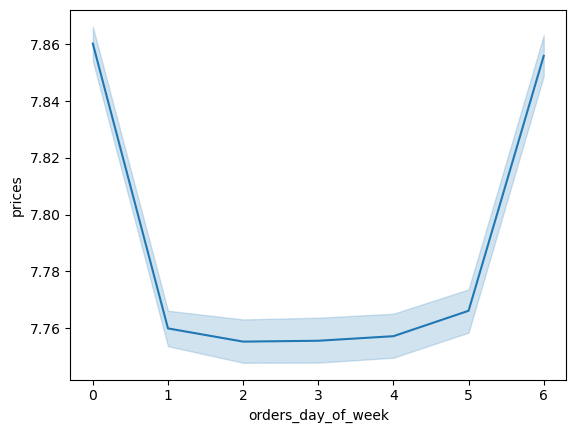

In [18]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## (Q3) Create a histogram of the “order_hour_of_day” column

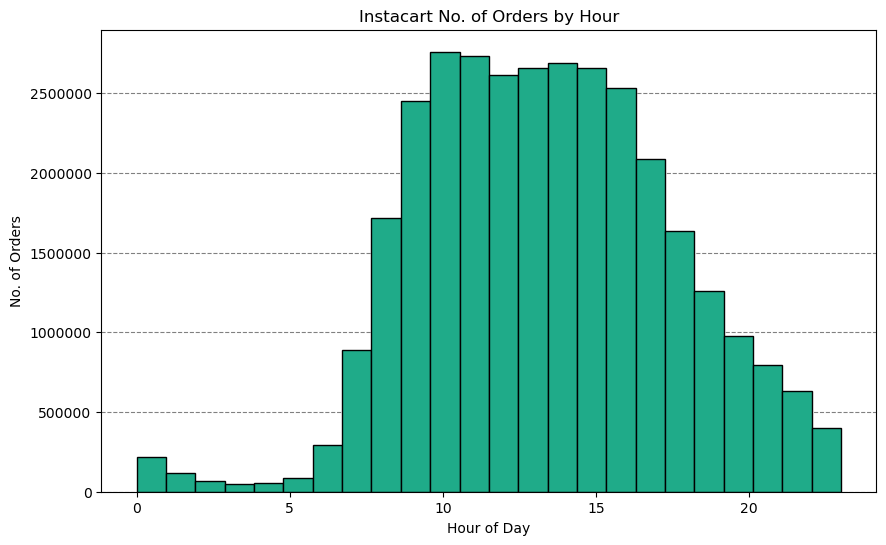

In [44]:
plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['order_hour_of_day'].plot.hist(bins = 24, 
                                              color = ['#1FAB89'],
                                              zorder = 2, 
                                              edgecolor = 'black')
plt.title('Instacart No. of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('No. of Orders')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_orders_by_hour.png'), bbox_inches = 'tight')


The histogram shows that most orders / purchases tend to occur in the middle of the day (typically between 9am and 4pm).

This indicates that the majority of shoppers could be ordering during their lunch breaks or after work (in instances where work ends before 5pm). However, the large amount of orders occuring at or around 9am suggests a large groups of customers prefer to do their shopping early (which could be the case during weekends or for shoppers who start work later in the day)

The histogram shows there are much less orders happening at night and the very early morning, which is to be expected.

## (Q4) Create a bar chart from the “loyalty_flag” column.

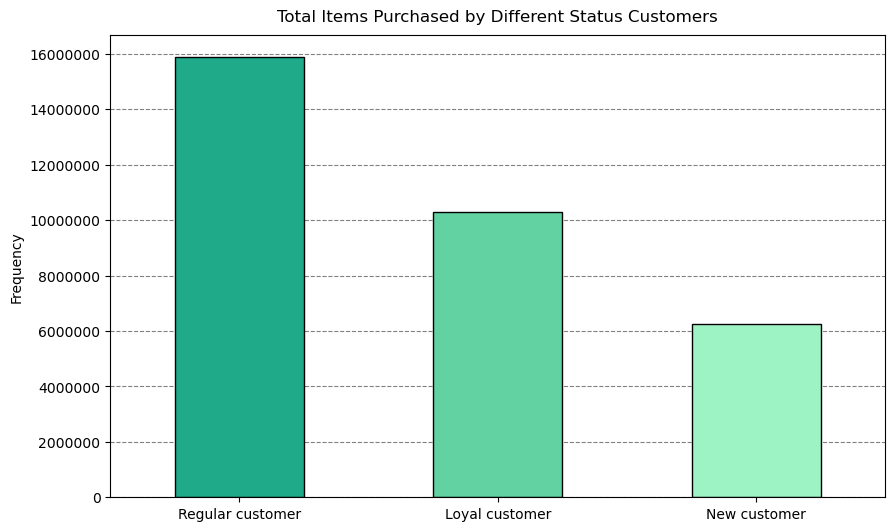

In [5]:
plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['#1FAB89', '#62D2A2', '#9DF3C4'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Total Items Purchased by Different Status Customers', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_loyalty_vs_total_item.png'), bbox_inches = 'tight')

Note that this shows the number of items purchased by each category of customer (the data is likely skewed)

## (Q5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [21]:
# Using the small sample from earlier in this script, make a reduced dataframe of only the relevant columns:
df_3 = small[['prices', 'order_hour_of_day']]

C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


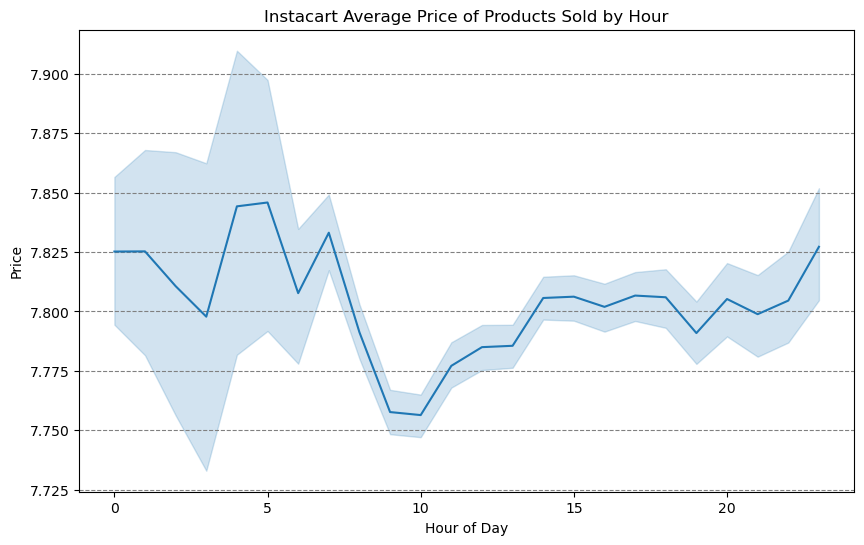

In [48]:
# Line chart:
plt.figure(figsize = (10, 6))
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')
plt.title('Instacart Average Price of Products Sold by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Price')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'instacart_average_product_price_.png'), bbox_inches = 'tight')

## (Q6) Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [23]:
# Will continue to use the small sample from earlier - create reduced dataframe with 'age' and 'n_dependants' column:
df_4 = small[['age', 'n_dependants']]

C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


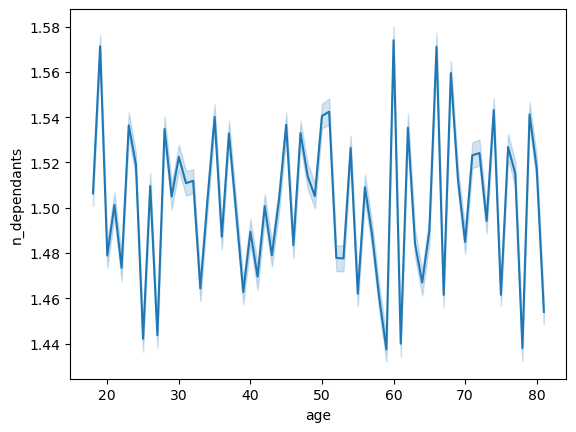

In [24]:
line_3 = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

The line chart shows that there is no clear correlation between age and number of dependants. This can be assessed because the line chart does not trend up, down, or form any other meaningful patterns.

## (Q7) You’ll also need to explore whether there’s a connection between age and spending power (income). Create a scatterplot.

In [25]:
# Reduce previous small sample to only include relevant columns
df_5 = small[['age', 'income']]

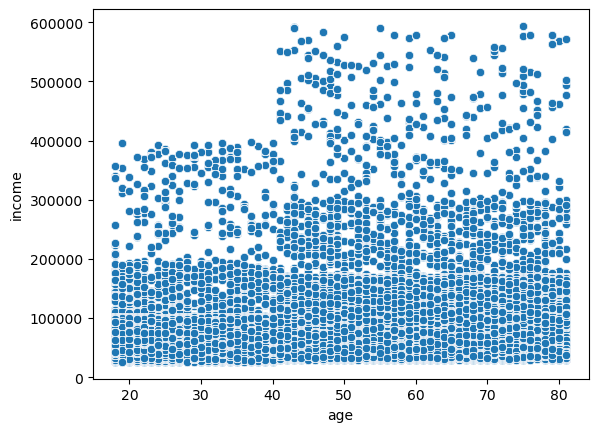

In [26]:
# Scatterplot using sample
scatterplot = sns.scatterplot(data = df_5, x = 'age', y = 'income')

The scatterplot shows there is a very wide range of incomes for all age groups. However, there is a notable and sudden increase in customers' incomes after the age of 40 (the heighest earners after 40 make about 200,000 dollars more than top earners before 40, and the density of incomes between 200,000 and 300,000 increases as well).

Overall, this scatterplot suggests that customers' earning potential and median incomes increases with age. Although, it would be beneficial to conduct a statistical analysis to more fully understand the correlation of this relationship.

## (Q8) Export visualisations

In [27]:
# Bar Chart - orders_day_of_week frequency

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'frequency_of_orders_days_of_week.png'))

In [28]:
# Histogram - order_hour_of_day

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'frequency_of_order_hour_of_day.png'))

In [29]:
# Bar Chart - loyalty_flag

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'loyalty_flag_distribution.png'))

In [30]:
# Line Chart - prices (expenditure) vs order_hour_of_day

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'expenditure_vs_order_hour_of_day'))

In [31]:
# Line Chart - age vs number of dependants

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customers_age_vs_number_of_dependants.png'))

In [32]:
# Scatterplot - age vs income

scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customers_age_vs_customers_income.png'))